<a href="https://colab.research.google.com/github/Harshitha-Bandaru/InternshipStudio_project/blob/master/Marketing_campaign_for_Banking_Products__Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing campaign of Banking Products**

Aim: To build a model whose classification goal is to predict the likelihood of a liability customer buying personal loans.


## **1. Importing the required libraries for EDA**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns                #visualisation
import matplotlib.pyplot as plt      #visualisation
%matplotlib inline 
sns.set(color_codes=True)
sns.set_style("ticks")
import os
##os.environ["PATH"] += os.pathsep + 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### ****Loading the dataset into colab****

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (3).csv


### **1.1 Loading the dataset into Dataframe**

In [3]:
import io
data=pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [4]:
## This gives the first five rows of the data set
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
## This gives the last five rows of the data set
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### **1.2 Checking the types of data and basic summary stats** 

In [6]:
## This gives the non-null counts and data type of each feature 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
## This returns the count, mean, median(50%), min, max, 25%, 75%, standard deviation of each feature
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
data.shape
## Inference : Our data has 5000 records and 14 features

(5000, 14)

In [9]:
## knowing unique values in a specific feature
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

# **2. Cleaning the Data**

In [10]:
## Checking for null values in the data
data.isnull().sum()
## Inference: We don't have any null values in the data

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
## Getting an overview from the data
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
## knowing unique values in each feature
for column in data.columns:
    print(f' Unique values in {column} is {len(data[column].unique())}')

 Unique values in ID is 5000
 Unique values in Age is 45
 Unique values in Experience is 47
 Unique values in Income is 162
 Unique values in ZIP Code is 467
 Unique values in Family is 4
 Unique values in CCAvg is 108
 Unique values in Education is 3
 Unique values in Mortgage is 347
 Unique values in Personal Loan is 2
 Unique values in Securities Account is 2
 Unique values in CD Account is 2
 Unique values in Online is 2
 Unique values in CreditCard is 2


As we can see, Id has no relevance in the prediction of target variable Personal Loan. So, we can can **drop 'ID'** column.

In [13]:
data.drop(['ID'],axis=1,inplace=True)

Since,Zipcode is categorical and falls under nominal data, we have to create dummy variables using one-hot encoding or label encoding(used when data variable is nominal).
For creating dummy variabes,there are 467 unique values which result in 467 new columns and we get the problem of multi collinearity.So, better to **drop 'Zipcode'**

In [14]:
data.drop(['ZIP Code'],axis=1,inplace=True)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


### **Checking for outliers**

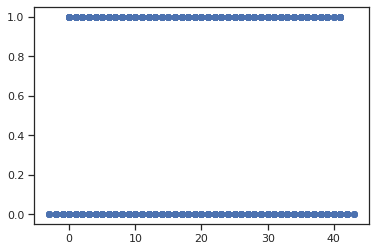

In [15]:
## checking for outliers
## using scatterplot
plt.scatter(data['Experience'],data['Personal Loan'])

We can see that, experience is distributed below '0'. And,we know that no person has a experience of less than 0 years. So,Experience column has outliers

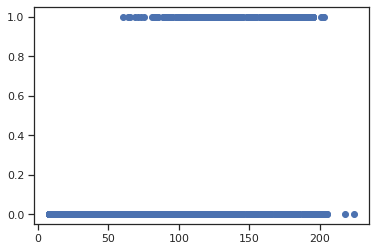

In [16]:
plt.scatter(data['Income'],data['Personal Loan'])

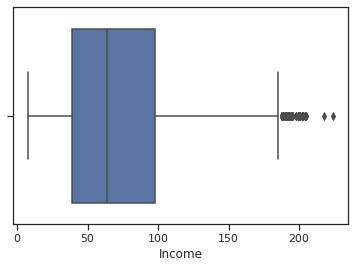

In [17]:
sns.boxplot(data['Income'])

From the above Boxplot, we can say that Income feature has got outliers

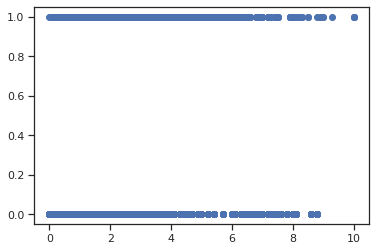

In [18]:
plt.scatter(data['CCAvg'],data['Personal Loan'])

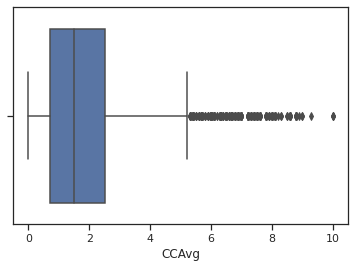

In [19]:
sns.boxplot(data['CCAvg'])

From the above graph,we can say that CCAvg has got outliers

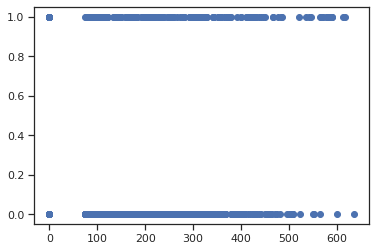

In [20]:
plt.scatter(data['Mortgage'],data['Personal Loan'])

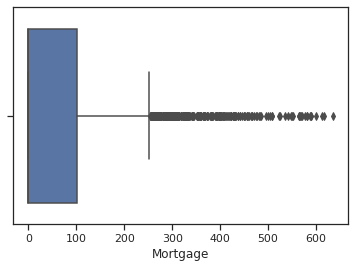

In [21]:
sns.boxplot(data['Mortgage'])

From the above graph, we ca say that Mortgage has got outliers

Now, we have to know what are the outliers. so, Here, I am using z-score

In [22]:
## code to detect outliers using z-score
outliers=[]
def detect_outliers(d):
  threshold=3
  mean=np.mean(d)
  std=np.std(d)

  for i in d:
    z_score=(i-mean)/std
    if(np.abs(z_score)>threshold):
      outliers.append(i)
  return outliers


In [23]:
outlier_pt=detect_outliers(data['Experience'])
print(outlier_pt)
## We know that Experience column has outliers from the boxplot, but z-score is not able to detect them 

[]


In [24]:
outlier_pt=detect_outliers(data['Mortgage'])
print(outlier_pt)

[412, 455, 366, 391, 617, 402, 392, 419, 466, 458, 547, 470, 378, 485, 364, 449, 587, 372, 524, 366, 442, 394, 475, 437, 428, 366, 382, 397, 380, 433, 483, 455, 421, 565, 394, 601, 567, 389, 372, 589, 397, 380, 535, 398, 446, 422, 428, 505, 400, 422, 569, 374, 408, 406, 452, 432, 477, 396, 582, 380, 467, 565, 635, 385, 437, 522, 496, 415, 392, 461, 368, 373, 383, 408, 442, 427, 364, 429, 431, 508, 416, 553, 368, 403, 500, 410, 449, 381, 402, 400, 428, 427, 464, 509, 481, 577, 422, 405, 571, 581, 550, 400, 612, 590, 541]


In [25]:
outlier_pt=detect_outliers(data['Income'])
print(outlier_pt)

[412, 455, 366, 391, 617, 402, 392, 419, 466, 458, 547, 470, 378, 485, 364, 449, 587, 372, 524, 366, 442, 394, 475, 437, 428, 366, 382, 397, 380, 433, 483, 455, 421, 565, 394, 601, 567, 389, 372, 589, 397, 380, 535, 398, 446, 422, 428, 505, 400, 422, 569, 374, 408, 406, 452, 432, 477, 396, 582, 380, 467, 565, 635, 385, 437, 522, 496, 415, 392, 461, 368, 373, 383, 408, 442, 427, 364, 429, 431, 508, 416, 553, 368, 403, 500, 410, 449, 381, 402, 400, 428, 427, 464, 509, 481, 577, 422, 405, 571, 581, 550, 400, 612, 590, 541, 224, 218]


In [26]:
outlier_pt=detect_outliers(data['CCAvg'])
print(outlier_pt)

[412, 455, 366, 391, 617, 402, 392, 419, 466, 458, 547, 470, 378, 485, 364, 449, 587, 372, 524, 366, 442, 394, 475, 437, 428, 366, 382, 397, 380, 433, 483, 455, 421, 565, 394, 601, 567, 389, 372, 589, 397, 380, 535, 398, 446, 422, 428, 505, 400, 422, 569, 374, 408, 406, 452, 432, 477, 396, 582, 380, 467, 565, 635, 385, 437, 522, 496, 415, 392, 461, 368, 373, 383, 408, 442, 427, 364, 429, 431, 508, 416, 553, 368, 403, 500, 410, 449, 381, 402, 400, 428, 427, 464, 509, 481, 577, 422, 405, 571, 581, 550, 400, 612, 590, 541, 224, 218, 8.9, 8.1, 8.0, 7.2, 7.4, 7.5, 7.8, 7.9, 7.4, 7.5, 7.9, 7.5, 7.3, 7.5, 7.5, 8.3, 8.0, 7.8, 7.2, 7.2, 8.6, 7.8, 7.6, 7.4, 8.1, 7.6, 7.6, 10.0, 8.1, 8.8, 8.1, 8.8, 7.6, 7.3, 7.4, 7.8, 8.0, 8.0, 8.8, 8.1, 9.0, 8.6, 7.4, 7.3, 7.4, 7.4, 7.6, 7.4, 7.2, 8.6, 8.3, 7.8, 7.4, 8.1, 7.3, 8.5, 8.0, 7.3, 8.0, 10.0, 7.3, 8.0, 10.0, 7.5, 7.5, 8.0, 8.8, 7.4, 7.3, 7.8, 7.4, 7.9, 7.5, 7.2, 8.0, 7.2, 8.8, 7.9, 7.6, 8.2, 7.3, 8.1, 7.5, 7.8, 8.6, 8.8, 8.0, 7.5, 8.8, 7.8, 7.2, 8.6, 8

From the above code, we can see that Income, CCAvg, Mortgage has got outliers. So,let's apply transformations and see if outliers are removed.

#### *Relationship Analysis*

In [27]:
## corelation matrix
corelation = data.corr()
corelation

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [28]:
exp = data['Experience']
age = data['Age']
cor = exp.corr(age)
print(cor)

0.9942148569683321


Here, the **correlation** is too **high** between the features **age and experience**.
So, we can drop either of the columns.Since,Experience column has got outliers, to get rid of them,I am **dropping Experience column**

In [29]:
data = data.drop(['Experience'],axis=1)
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


 **3. Exploratory Data Analysis**

##### **3.1 Number Of unique in each column**

In [30]:
## knowing unique values in each feature
for column in data.columns:
    print(f' Unique values in {column} is {len(data[column].unique())}')

 Unique values in Age is 45
 Unique values in Income is 162
 Unique values in Family is 4
 Unique values in CCAvg is 108
 Unique values in Education is 3
 Unique values in Mortgage is 347
 Unique values in Personal Loan is 2
 Unique values in Securities Account is 2
 Unique values in CD Account is 2
 Unique values in Online is 2
 Unique values in CreditCard is 2


###### **3.2 Number of people with zero Mortgage**

In [31]:
## Number of People with zero mortgage
print("Number of People with zero mortgage : ",((data.Mortgage==0).sum()))

Number of People with zero mortgage :  3462


Inference: There are 3462 people with 0 mortgage out of 5000,making the distribution skewed

##### **3.3 Number of people with zero credit card spending per month**

In [32]:
## Number of people with zero credit card spending per month
print("Number of people with zero credit card spending per month : ",((data.CCAvg==0).sum()))

Number of people with zero credit card spending per month :  106


Inference: There are 106 people with zero credit card spending per month

##### **3.4  Value counts of all categorical columns**

In [33]:
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [34]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [35]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [36]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [37]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [38]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

By performing value counts on categorical columns , we get to know the distribution of customers in each category of a feature.

### **3.5 Univariate Analysis**

In [39]:
data.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


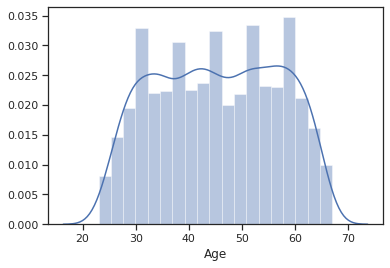

In [40]:
## Age has symmetric distribution
sns.distplot(data.Age)

From the data above (describe function), we can see that the mean and median is almost same.That means ,we can say that 'Age' is normally distributed.

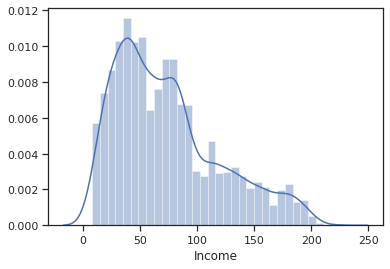

In [41]:
## Income is a right skewed distribution
sns.distplot(data.Income)
## so,in order to use this feature in model building,we have to do some transformations,cause
## in logistic regression and some other Machine learning Algorithms, you have this underlying assumption that features are normally distributed

From the describe function ,we can see that Income is positively skewed. Most of the bank customers have 'Income' between 45k to 55k. Also, we can see that the mean is greater than median.

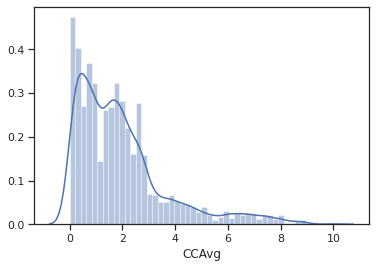

In [42]:
## CCAvg is a right skewed distribution
sns.distplot(data.CCAvg)

CCAvg is also a positively skewed variable. The average spending is between 0k to 10k and most of the people spends less than 2.5k

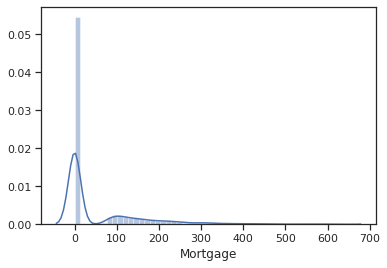

In [43]:
## Mortgage is highly skwed
sns.distplot(data.Mortgage)

Most of the people(upto 75%) has a Mortgage of less than 40k. But we can see that the maximum vallue is 635k. So, we can say that Mortgage is highly skewed.

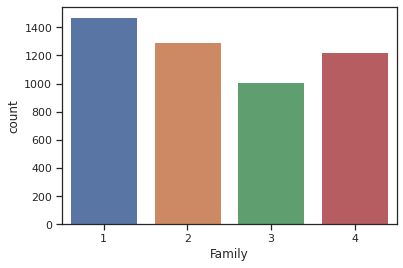

In [44]:
sns.countplot(data.Family)

From the above graph, we can say that Family variable is evenly distributed and most of the customers are single

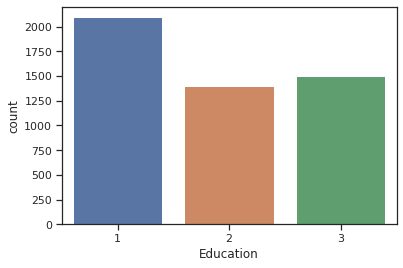

In [45]:
sns.countplot(data.Education)

It seems 2096 of the customers are undergraduate. After this, professionals(1501) are more than graduate(1403).

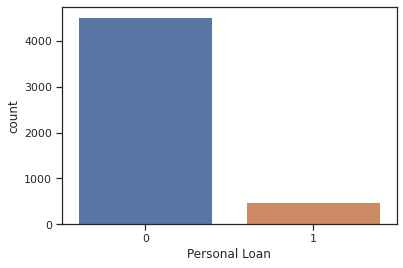

In [46]:
sns.countplot(data['Personal Loan'])

In [47]:
df_pl=data.loc[data['Personal Loan']==1]
df_pl

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,180,1,8.9,3,0,1,0,0,0,0
16,38,130,4,4.7,3,134,1,0,0,0,0
18,46,193,2,8.1,3,0,1,0,0,0,0
29,38,119,1,3.3,2,0,1,0,1,1,1
38,42,141,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4883,38,129,3,4.1,3,0,1,0,1,1,1
4927,43,121,1,0.7,2,0,1,0,1,1,1
4941,28,112,2,1.6,2,0,1,0,0,1,0
4962,46,122,3,3.0,3,0,1,0,1,1,1


In [48]:
df_pl.shape

(480, 11)

In [49]:
df_npl=data.loc[data['Personal Loan']==0]
df_npl

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [50]:
df_npl.shape

(4520, 11)

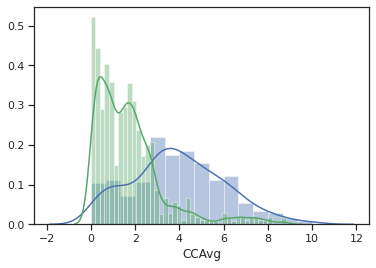

In [51]:
sns.distplot( df_pl['CCAvg'], color = 'b')
sns.distplot( df_npl['CCAvg'], color = 'g')

In [52]:
print('Credit card spending of Non-Loan customers: ',df_npl['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df_pl['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Inference : The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

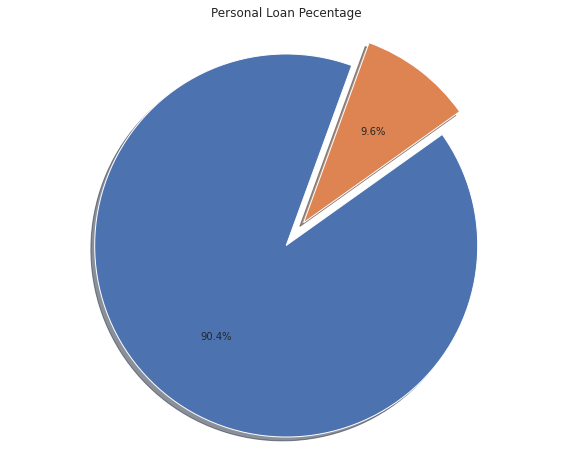

In [53]:
## pie chart
tempdf = pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
tempdf.columns = ['Labels','Personal Loan']
fig1,ax1 = plt.subplots(figsize=(10,8))
explode = (0,0.15)
ax1.pie(tempdf['Personal Loan'], explode=explode, autopct='%1.1f%%', shadow=True, startangle=70)
ax1.axis('equal') 
plt.title('Personal Loan Pecentage')
plt.show()

### **3.5 Multivariate Analysis**

Influence of Income and Education on Personal Loan

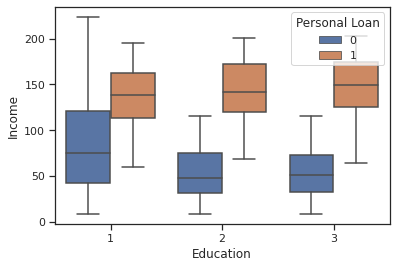

In [54]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

Inference: From the above graph, we can say that the customeers who have more Education(i.e, Level 1) are getting more Income. However customers who has taken the personal loan have the same income levels and It seems the customers having more income are granted loan across each Education Level

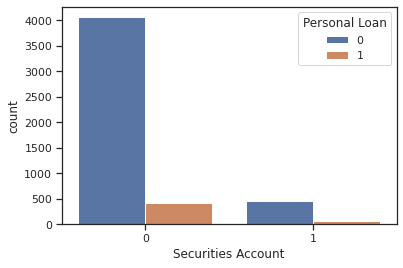

In [55]:
sns.countplot(x='Securities Account',hue='Personal Loan',data=data)

Inference :  Majority of people having securities accounts donot have personal loan and the people who have a security account are more likely to take loan

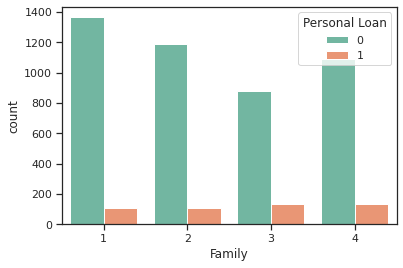

In [56]:
sns.countplot(x='Family',hue='Personal Loan',data=data,palette='Set2')

Inference : From the above graph, we can say that Family size does not have any impact on personal loan. But it seems families with size of 3 are more likely to take loan. While considering future campaign this might be a good association.

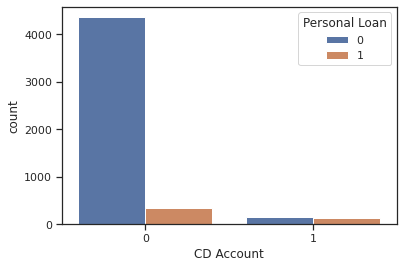

In [57]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan') 

Inference : From the above graph,we can say that Customers who does not have CD account , does not have loan as well. This seems to be majority. But, inetrestingly almost all customers who has CD account has loan as well

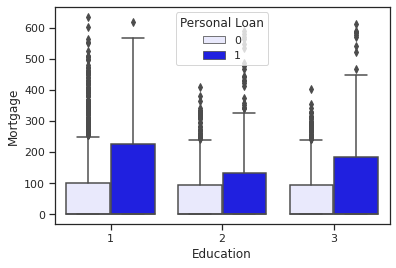

In [58]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='blue') 

Inference: From the above chart, we can say that customer who do not have personal loan have low mortgage and customer who has personal loan have high mortgage

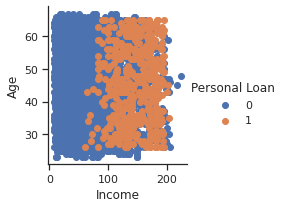

In [59]:
sns.FacetGrid(data,hue='Personal Loan').map(plt.scatter,"Income","Age").add_legend()

From the above graph, we can say that people having less income have less tendency to take personal loan.

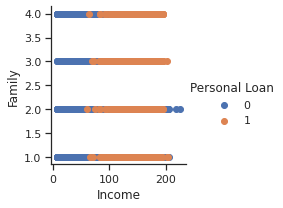

In [60]:
sns.FacetGrid(data,hue='Personal Loan').map(plt.scatter,"Income","Family").add_legend()

Looking at the above plot, families with income less than 100K are less likely to take loan,than families with high income

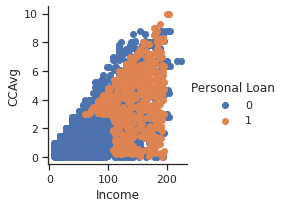

In [61]:
sns.FacetGrid(data,hue='Personal Loan').map(plt.scatter,"Income","CCAvg").add_legend()

From the above graph, we can see that the customers who have income greater than 100k, are more likely to take personal loan.

#### **Heat Map**

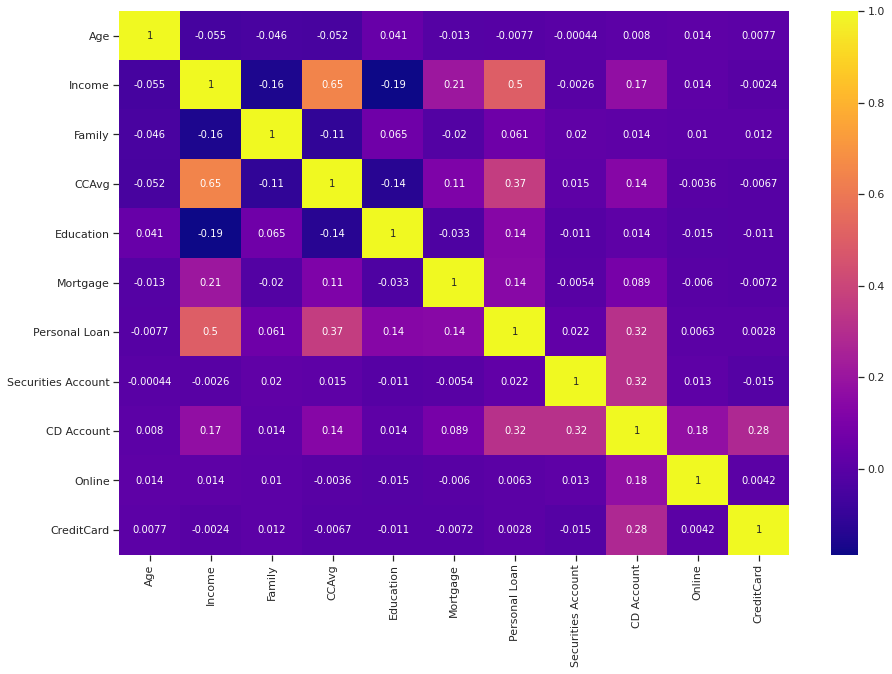

In [62]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='plasma',annot=True)

#### **Pair Plot**

A pairs plot allows us to see both distribution of single variables and relationships between two variables

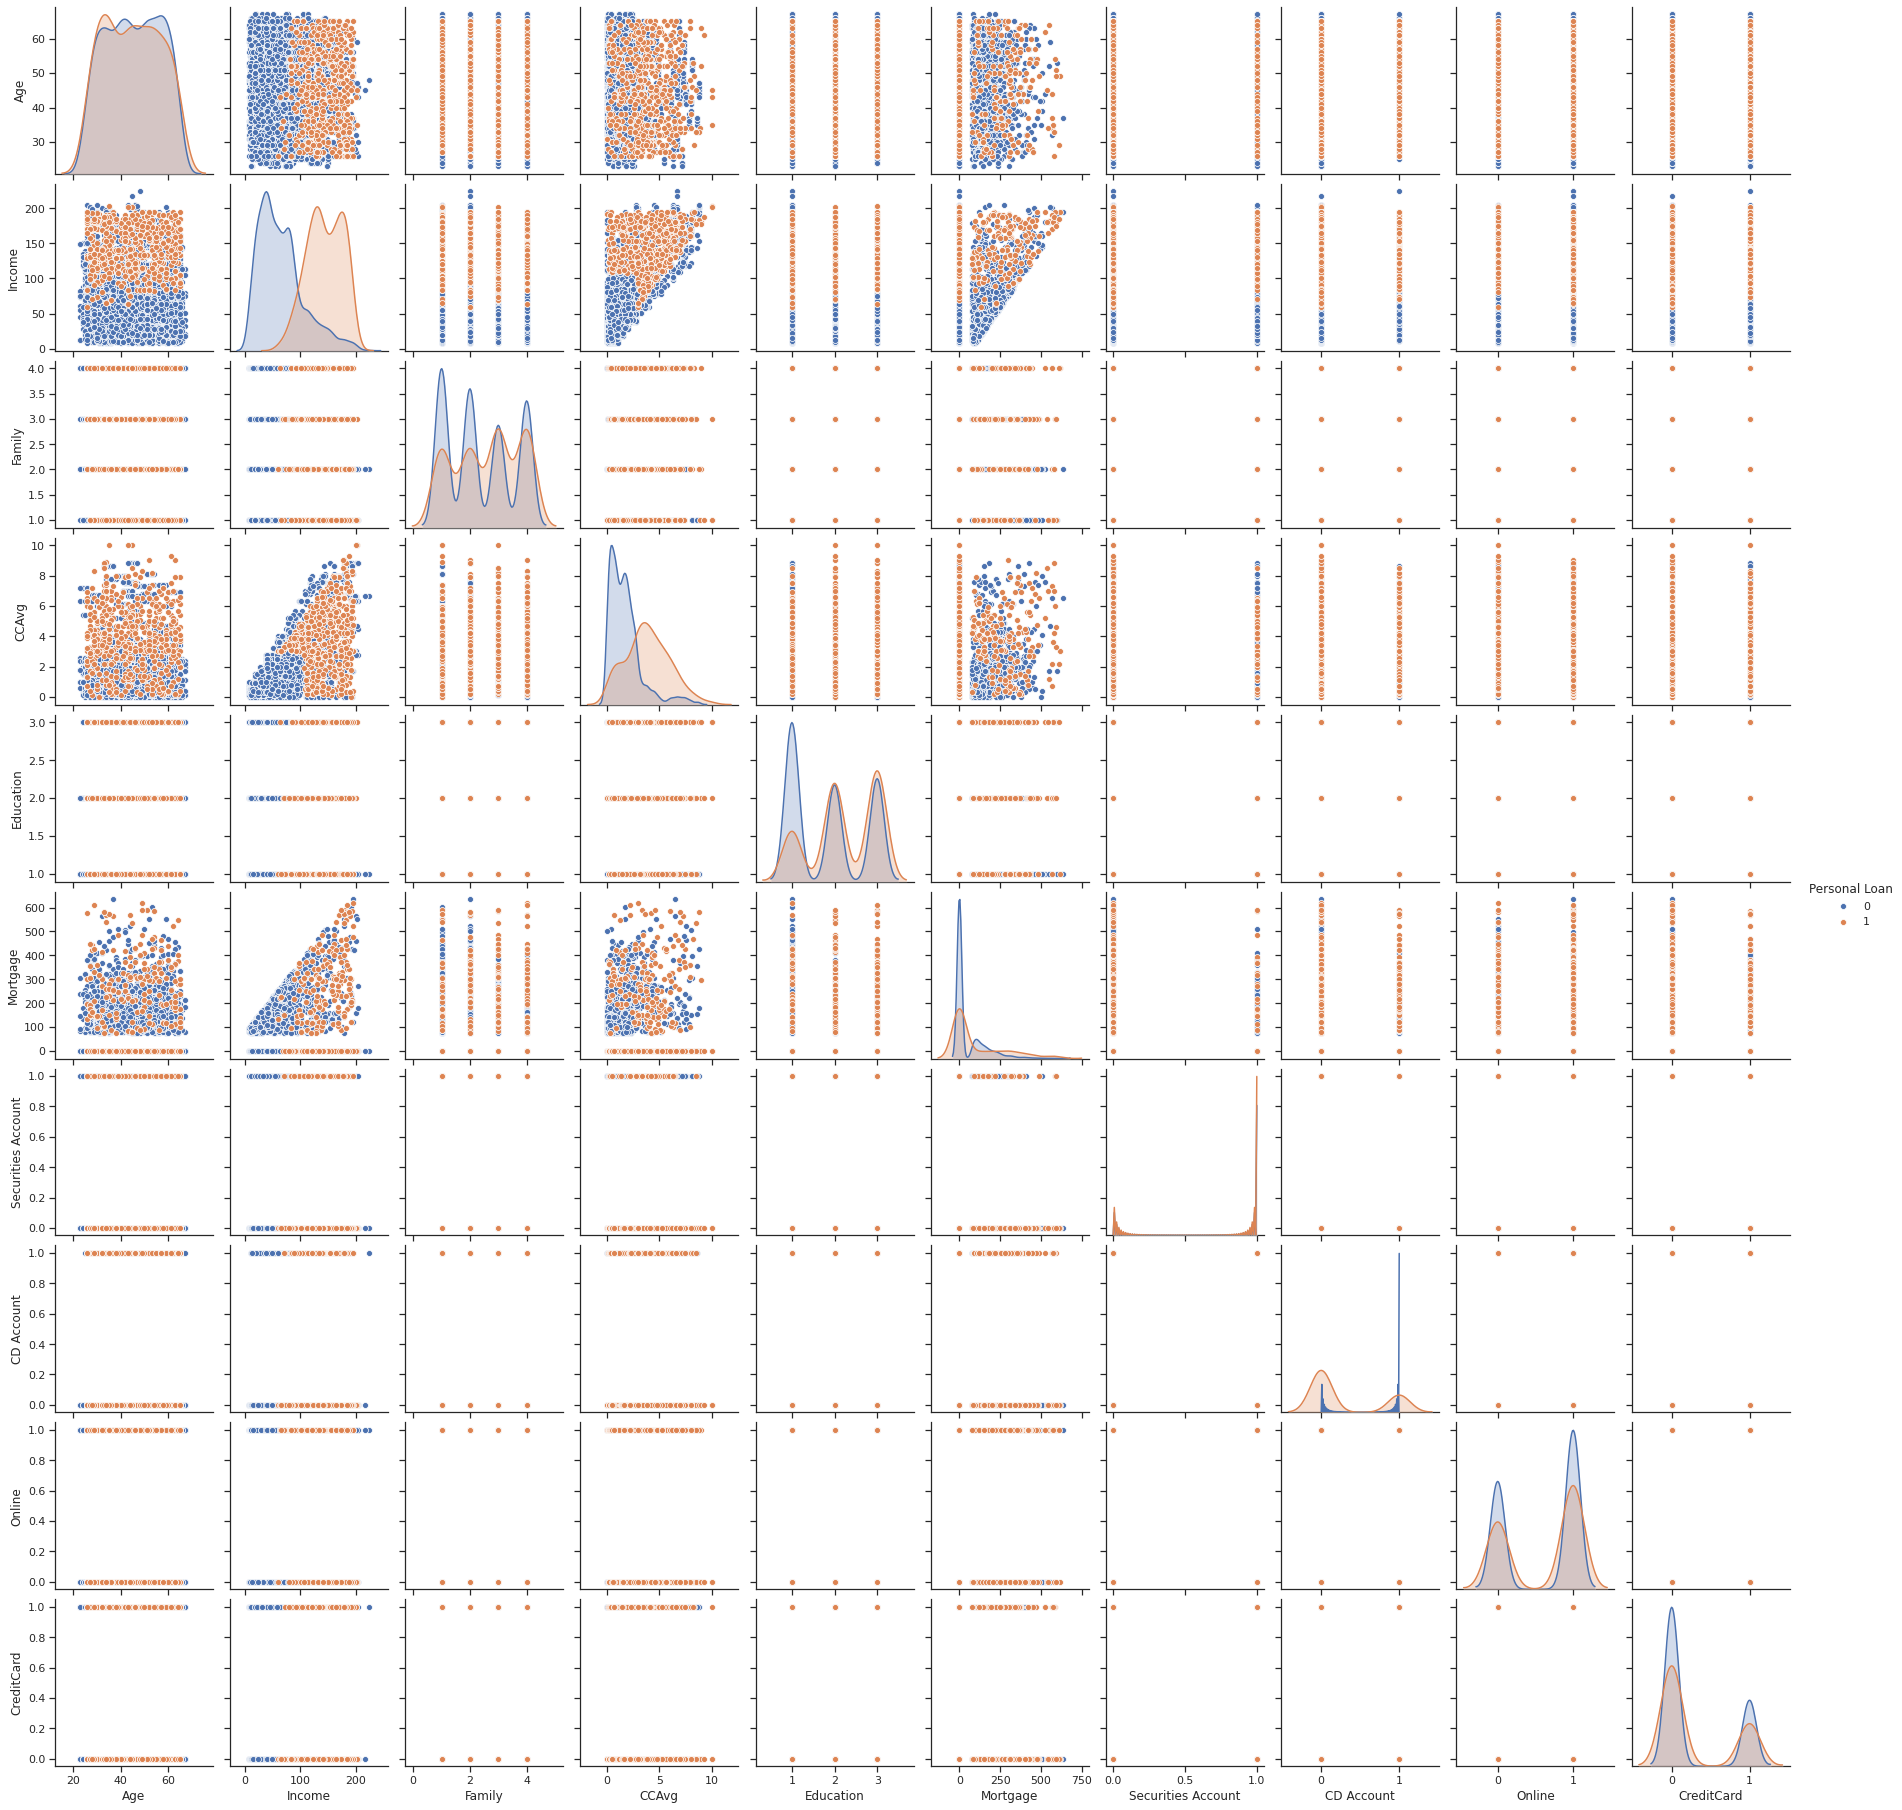

In [63]:
## Pairplot
sns.pairplot(data,hue='Personal Loan',height=2.5)

In [64]:
data_X=data.loc[:,data.columns != "Personal Loan"]
data_Y=data['Personal Loan'].values
data_X.shape,data_Y.shape

((5000, 10), (5000,))

Here,we have separated the input features and target variable

## **4.Transformation of Feature variables**

We know that Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data. so,we can opt for yeo-jhonson.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


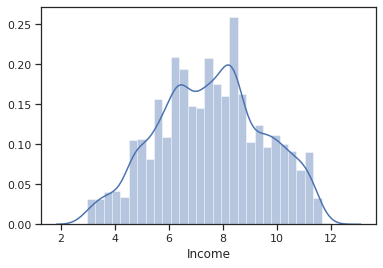

In [65]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X['Income'].values.reshape(-1,1))
data_X['Income']=pt.transform(data['Income'].values.reshape(-1,1))
sns.distplot(data_X['Income'])

Previously, we have seen that Income has outliers. After, applying power transformation we  can see that the outliers are removed.

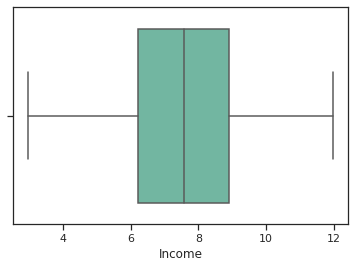

In [66]:
sns.boxplot(data_X['Income'],orient="h",palette="Set2")

From the above boxplot, we can see that there are no outliers in Income

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


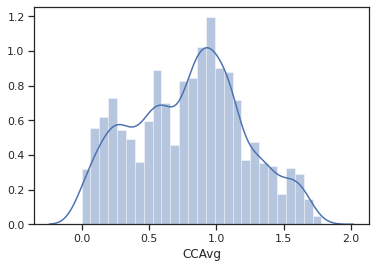

In [67]:
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
data_X['CCAvg']=pt.transform(data['CCAvg'].values.reshape(-1,1))
sns.distplot(data_X['CCAvg'])

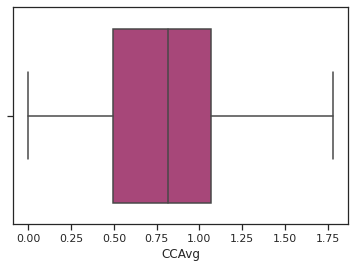

In [68]:
sns.boxplot(data_X['CCAvg'],orient="h",palette="magma")

From the above boxplot, it is clearly visible that after applying power transformation, there are no outliers in CCAvg feature.

#### We cannot apply power transformation to Mortgage as it seems like there is discontinuity in the data. Instead we can opt for binning.

In [69]:
data_X['Mortgage_mod']=pd.cut(data_X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop('Mortgage',axis=1,inplace=True)
## We have made the Mortgage variable as ordinal varible.

In [70]:
data_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_mod
0,25,6.827583,4,0.845160,1,1,0,0,0,0
1,45,5.876952,3,0.814478,1,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,1,0


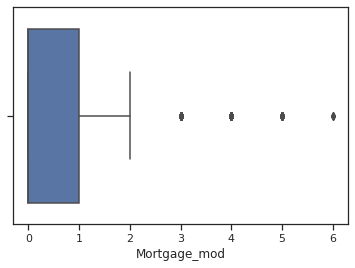

In [71]:
sns.boxplot(data_X['Mortgage_mod'])

Here, even after applying binning, we can see that Mortagage has got few outliers. But, they are very few and ignorable

## **Normalizing the Data and Splitting the data**

Stratified random sampling is a probability sampling technique wherein the researcher divides the entire population into different subgroups or strata, then randomly selects the final subjects proportionally from the different strata.



In our data, there are only 480(*9.6%*) customers out of 5000, who has taken Personal loan(our target variable). So,as we know that **Stratified sampling** method ensures the presence of the key subgroup within the sample,we can split the data using stratified sampling

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler_x = StandardScaler()
scaler_y = StandardScaler()
train_X, test_X, train_Y, test_Y = train_test_split(data_X,data_Y, test_size=0.3, stratify=data_Y,random_state=0)
scaler_x.fit_transform(train_X)
## For training data, we just need to transform it
scaler_x.transform(test_X)

array([[-0.97265109,  1.804387  , -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.38356794, -0.34389746, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.16034314, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.96255849, -0.34389746, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.36542751, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.12557467,  0.52957214, ...,  0.83854816,
        -0.65376311, -0.47490853]])

In [73]:
lab_names = ['willnot take loan', 'will take loan']

 **6. Applying different Machine Learning Algorithms**

Umm,well before going to apply different Machine Learning Algorithms to our data. Let's have a brief overview of the **Metrics to evaluate our machine learning model.**

**Classification Accuracy** \\
*Accuracy=Number of correct predictions/Total number of predictions made* \\
 But, the problem occurs when the cost of misclassification of the minor class samples are very high

**Confusion Matrix** \\
It gives output in the form of a marix and describes the complete performance of the model \\
True Positives : The cases in which we predicted YES and the actual output was also YES. \\
True Negatives : The cases in which we predicted NO and the actual output was NO. \\
False Positives : The cases in which we predicted YES and the actual output was NO. \\
False Negatives : The cases in which we predicted NO and the actual output was YES.

**Area under the Curve** \\
Sensitivity=True Positive/(False Negative+True Positive) \\
Sensitivity: When its actually yes how often it predicts yes \\

Specificity=True Negative/(True Negative+False Positives) \\
Specificity: When its actually no, how often does it predict no \\

False positive rate=False Positive/(False Positive+True Negative) \\
As evident, AUC has a range of [0, 1]. The greater the value, the better is the performance of our model


**F1 Score** \\
F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1] \\
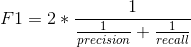 \\
F1 Score is used to measure a test’s accuracy \\
Precision=True Positive/(False Positive+True Positive) \\
Precision: When it predicts yes, how often is it correct \\
Recall=True Positive/(False Negative+True Positive) \\
Recall: all samples that should have been identified as positive

**Mean Absolute Error** \\
Mean Absolute Error is the average of the difference between the Original Values and the Predicted Values. It gives us the measure of how far the predictions were from the actual output

**Root Mean  squared Error** \\
The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

**R2 score** : **R^2 (coefficient of determination) regression score function** \\
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0

### **Logistic Regression**

Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function

In [74]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=300, C=1.0)
lr_model.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_predict=lr_model.predict(test_X)
print(y_predict)

[1 0 0 ... 0 0 0]


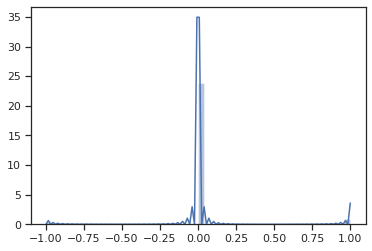

In [76]:
sns.distplot((test_Y - y_predict),bins = 50)

In [77]:
from sklearn import metrics
print("Training Accuracy of Linear Regression model:",lr_model.score(train_X,train_Y)*100)
print("Testing Accuracy of Linear Regression model:",metrics.accuracy_score(test_Y,y_predict)*100)

Training Accuracy of Linear Regression model: 95.6
Testing Accuracy of Linear Regression model: 95.33333333333334


In [78]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score : ', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error :  0.04666666666666667
Root Mean Squared Error : 0.21602468994692867
R2 Score :  0.4622664700098328


In [79]:
## Another method of finding accuracy
lr_model.score(test_X,test_Y)*100

95.33333333333334

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_Y,y_predict)

array([[1337,   19],
       [  51,   93]])

In [81]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [82]:
from sklearn.metrics import precision_score,recall_score
precision_lr = precision_score(test_Y, y_predict, labels=lab_names)
print('Precision:', precision_lr)
recall_lr = recall_score(test_Y, y_predict)
print('Recall:', recall_lr)

Precision: 0.8303571428571429
Recall: 0.6458333333333334


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

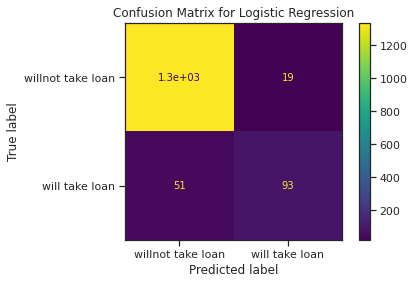

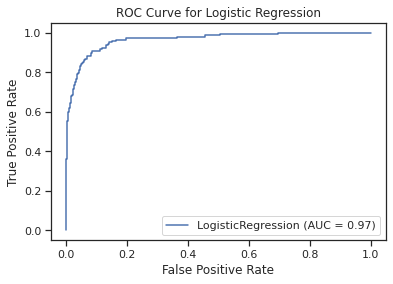

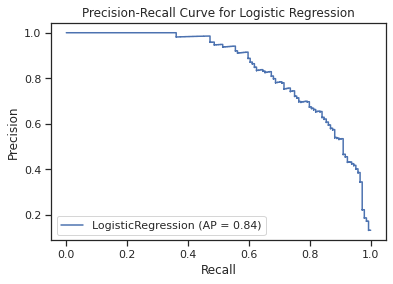

In [83]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(lr_model, test_X, test_Y, display_labels=lab_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(lr_model, test_X, test_Y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(lr_model, test_X, test_Y)
plt.title('Precision-Recall Curve for Logistic Regression')



---



---


**Inference:** Logistic Regression got training accuracy of 95.6% and testing accuracy of 95.33% but we can see that the **false negatives are 51** which are relatively high and can badly affect the campaign .Let's comapare with other models.

---



---



### **Decison Tree Classifier**

A Decision tree is a graphical representation of all the posible solutions to a decisio based on certain conditions.
Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.
CART (Classification And Regression Tree) is a decision tree algorithm.
Mathematically, we can write Gini Impurity as following. \\
$I_{gini}$ = 1-(the probability of target NO)^2-(the probability of target YES)^2

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=0, max_depth=8,criterion='gini')
dt_model.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

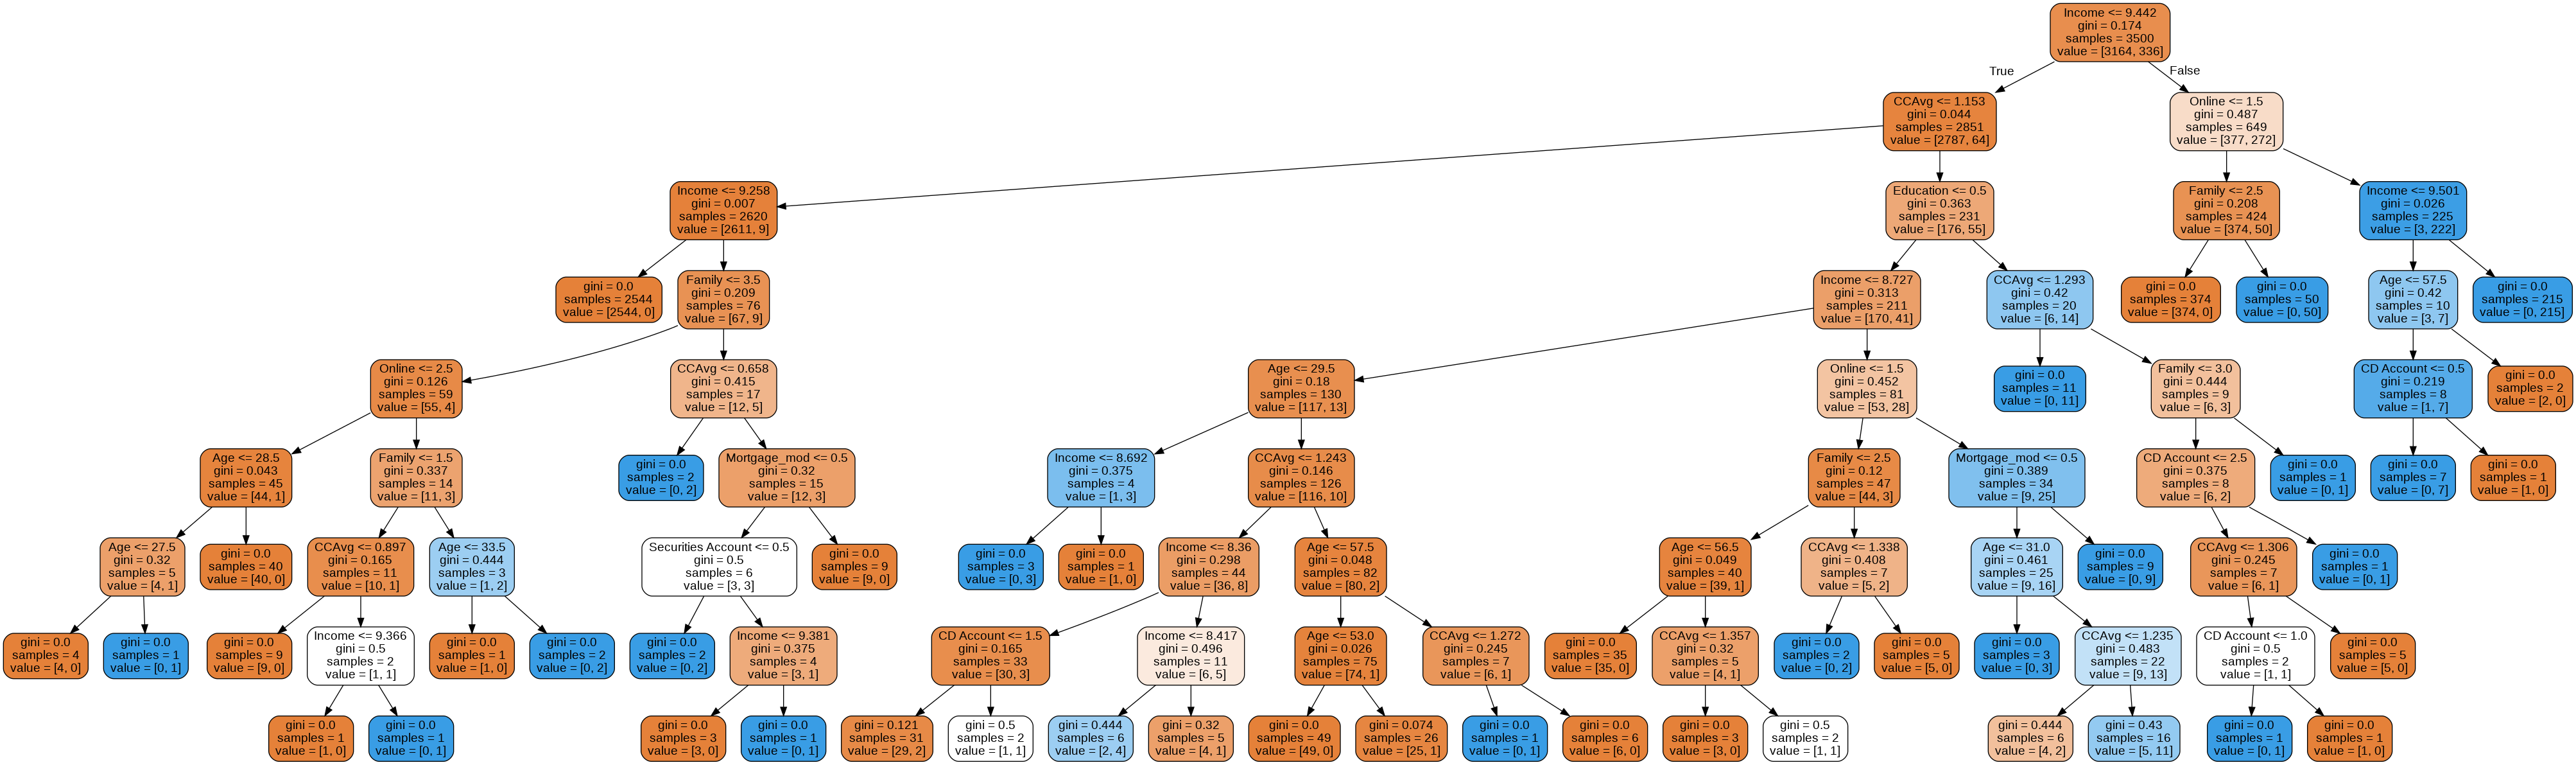

In [85]:
import pydotplus
from IPython.display import Image, display
from sklearn import tree
dot_data = tree.export_graphviz(dt_model, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage_mod', 'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(data=graph.create_png()))

In [86]:
y_predict=dt_model.predict(test_X)
print(y_predict)

[1 0 0 ... 0 0 0]


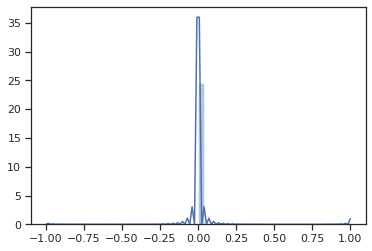

In [87]:
sns.distplot((test_Y - y_predict),bins = 50)

In [88]:
print("Training Accuracy of Decision Tree model:",dt_model.score(train_X,train_Y)*100)
print("Testing Accuracy of Decision Tree model:",metrics.accuracy_score(test_Y,y_predict)*100)

Training Accuracy of Decision Tree model: 99.57142857142857
Testing Accuracy of Decision Tree model: 98.13333333333333


In [89]:
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error :  0.018666666666666668
Root Mean Squared Error :  0.13662601021279466
R2 Score 0.7849065880039331


In [90]:
## Another way of checking accuracy score
dt_model.score(test_X , test_Y)*100

98.13333333333333

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_Y,y_predict)

array([[1342,   14],
       [  14,  130]])

In [92]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [93]:
from sklearn.metrics import precision_score,recall_score
precision_dt = precision_score(test_Y, y_predict, labels=lab_names)
print('Precision:', precision_dt)
recall_dt = recall_score(test_Y, y_predict)
print('Recall:', recall_dt)

Precision: 0.9027777777777778
Recall: 0.9027777777777778


Text(0.5, 1.0, 'Precision-Recall Curve for Decision Tree Classifier')

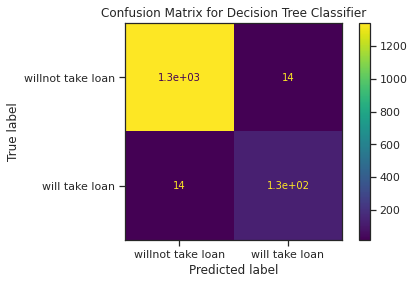

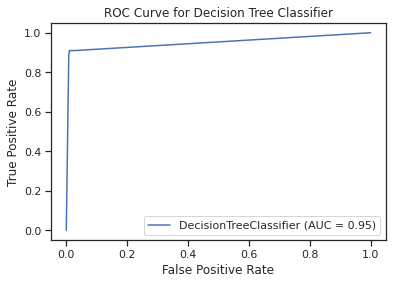

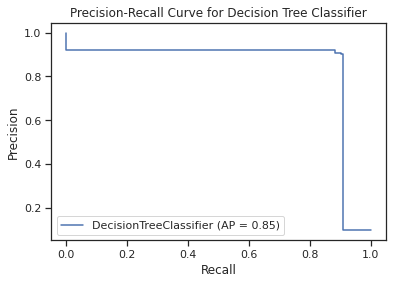

In [94]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(dt_model, test_X, test_Y, display_labels=lab_names)
plt.title('Confusion Matrix for Decision Tree Classifier')
plot_roc_curve(dt_model, test_X, test_Y)
plt.title('ROC Curve for Decision Tree Classifier')
plot_precision_recall_curve(dt_model, test_X, test_Y)
plt.title('Precision-Recall Curve for Decision Tree Classifier')



---



---


**Inference:**In the Decision tree model, we can see that we got a training accuracy of 99.57 % and testing accuracy 98.1 % .Here, we can also see that number of false negatives(that means they actually take loan but we predicted as 'NO') are very low which can help the bank to do the campaign effectively.

---



---



### **Naive Bayes**

Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features.

In [95]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(train_X, train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
y_predict=naive_model.predict(test_X)
print(y_predict)

[1 0 0 ... 0 0 0]


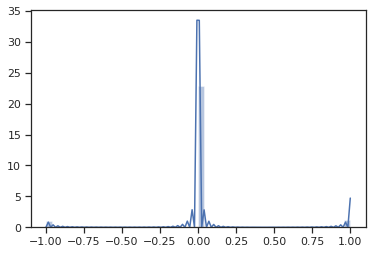

In [97]:
sns.distplot((test_Y - y_predict),bins = 50)

In [98]:
print("Training Accuracy of Naive Bayes model:",naive_model.score(train_X,train_Y)*100)
print("Testing Accuracy of Naive Bayes model:",metrics.accuracy_score(test_Y,y_predict)*100)

Training Accuracy of Naive Bayes model: 90.85714285714286
Testing Accuracy of Naive Bayes model: 91.33333333333333


In [99]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error:  0.08666666666666667
Root Mean Squared Error 0.2943920288775949
R2 Score 0.0013520157325466187


In [100]:
## Another method of finding accuracy
naive_model.score(test_X,test_Y)*100

91.33333333333333

In [101]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.55      0.53      0.54       144

    accuracy                           0.91      1500
   macro avg       0.75      0.74      0.75      1500
weighted avg       0.91      0.91      0.91      1500



In [102]:
from sklearn.metrics import precision_score,recall_score
precision_nb = precision_score(test_Y, y_predict, labels=lab_names)
print('Precision:', precision_nb)
recall_nb = recall_score(test_Y, y_predict)
print('Recall:', recall_nb)

Precision: 0.55
Recall: 0.5347222222222222


In [103]:
confusion_matrix(test_Y,y_predict)

array([[1293,   63],
       [  67,   77]])

Text(0.5, 1.0, 'Precision-Recall Curve for Naive Bayes Model')

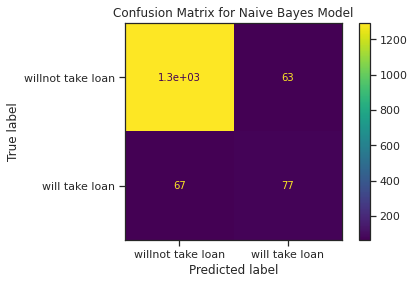

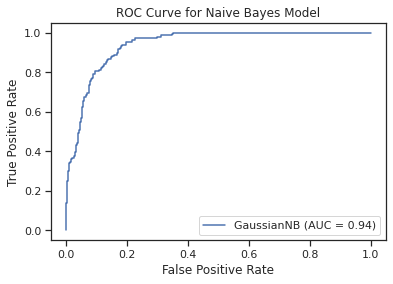

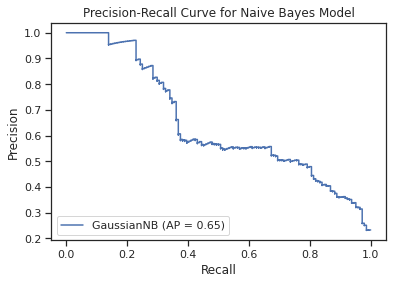

In [104]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(naive_model, test_X, test_Y, display_labels=lab_names)
plt.title('Confusion Matrix for Naive Bayes Model')
plot_roc_curve(naive_model, test_X, test_Y)
plt.title('ROC Curve for Naive Bayes Model')
plot_precision_recall_curve(naive_model, test_X, test_Y)
plt.title('Precision-Recall Curve for Naive Bayes Model')



---



---
**Inference:**For,Naive Bayes Model ,we can see that, we've got an training accuracy of 90.8 and Testing Accuracy 91.33. But, here we can see that the number of false negatives is very high i.e, 67 values which is not a good business insight. That too, the previous models, both logistic regression and Decision tree classifier has more accuracy and less false negatives. so,this model is not very useful for the personal loan campaign.


---



---




## **Random Forest Classifier**

Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement. And,its advantages are ***Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases***.

In [105]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(max_depth=9, random_state=0, n_estimators=800)
randomforest_model.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

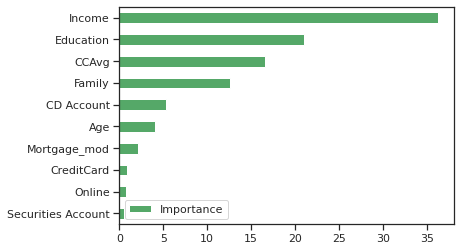

In [106]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g')

In [107]:
randomforest_model.score(test_X,test_Y)

0.986

In [108]:
y_predict=randomforest_model.predict(test_X)
print(y_predict)

[1 0 0 ... 0 0 0]


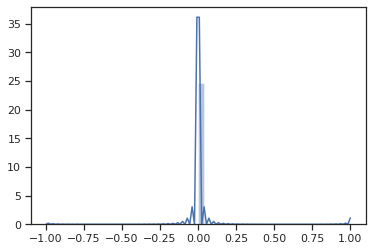

In [109]:
sns.distplot((test_Y - y_predict),bins = 50)

In [110]:
print("Training Accuracy of Random Forest model:",randomforest_model.score(train_X,train_Y)*100)
print("Testing Accuracy of Random Forest model:",metrics.accuracy_score(test_Y,y_predict)*100)

Training Accuracy of Random Forest model: 99.68571428571428
Testing Accuracy of Random Forest model: 98.6


In [111]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error:  0.014
Root Mean Squared Error 0.11832159566199232
R2 Score 0.8386799410029498


In [112]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.89      0.92       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [113]:
from sklearn.metrics import precision_score,recall_score
precision_r = precision_score(test_Y, y_predict, labels=lab_names)
print('Precision:', precision_r)
recall_r = recall_score(test_Y, y_predict)
print('Recall:', recall_r)

Precision: 0.9624060150375939
Recall: 0.8888888888888888


In [114]:
confusion_matrix(test_Y,y_predict)

array([[1351,    5],
       [  16,  128]])

Text(0.5, 1.0, 'Precision-Recall Curve for Randomforest Classifier')

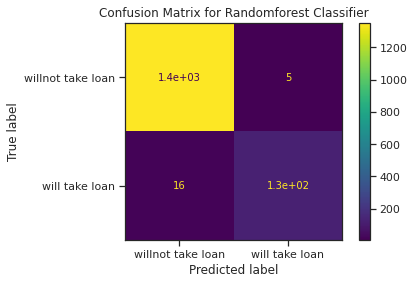

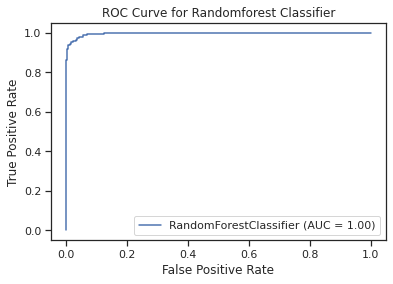

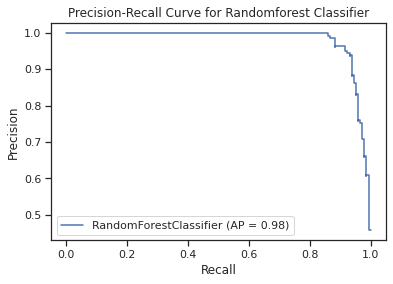

In [115]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(randomforest_model, test_X, test_Y, display_labels=lab_names)
plt.title('Confusion Matrix for Randomforest Classifier')
plot_roc_curve(randomforest_model, test_X, test_Y)
plt.title('ROC Curve for Randomforest Classifier')
plot_precision_recall_curve(randomforest_model, test_X, test_Y)
plt.title('Precision-Recall Curve for Randomforest Classifier')



---



---


For the Random Forest classifier,the Training Accuracy is 99.68 and **Testing Accuracy is 98.6**,both are pretty good values.Here,the **false negatives** are **less,16**(that means they actually take loan but we predicted them as NO),which is a good insight.we can see that the **false positives**(that means we predicted that they take loan but they don't actually take it) are also very **less - 4** . 
we can say that a model with less false negatives and less false positives is very good business model. \\
*so, we can say that we can use Random Forest Classifier model to the bank personal loan campaign.*

---



---



## **KNeighbors Classifier**

KNN Algorithm stores all the avialable cases  and classify new cases based on similarity measures. The value of k in KNN algorithm is the nearest neighbors we wish to take vote from.

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(train_X, train_Y)    
predicted = knn.predict(test_X)

In [117]:
y_predict=knn.predict(test_X)
print(y_predict)

[1 0 0 ... 0 0 0]


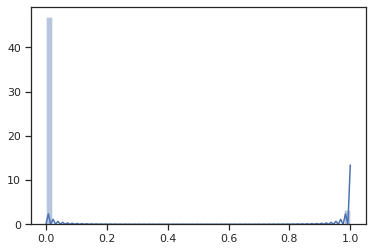

In [118]:
sns.distplot((test_Y - y_predict),bins = 50)

In [119]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error:  0.06333333333333334
Root Mean Squared Error 0.2516611478423583
R2 Score 0.27021878072763017


In [120]:
print("Training Accuracy of KNeighborsClassifier model:",knn.score(train_X,train_Y)*100)
print("Testing Accuracy of KNeighborsClassifiers model:",metrics.accuracy_score(test_Y,y_predict)*100)

Training Accuracy of KNeighborsClassifier model: 93.60000000000001
Testing Accuracy of KNeighborsClassifiers model: 93.66666666666667


In [121]:
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1356
           1       1.00      0.34      0.51       144

    accuracy                           0.94      1500
   macro avg       0.97      0.67      0.74      1500
weighted avg       0.94      0.94      0.92      1500



In [122]:
precision_knn = precision_score(test_Y, y_predict, labels=lab_names)
print('Precision:', precision_nb)
recall_knn = recall_score(test_Y, y_predict)
print('Recall:', recall_nb)

Precision: 0.55
Recall: 0.5347222222222222


Text(0.5, 1.0, 'Precision-Recall Curve for KNeighborsClassifier')

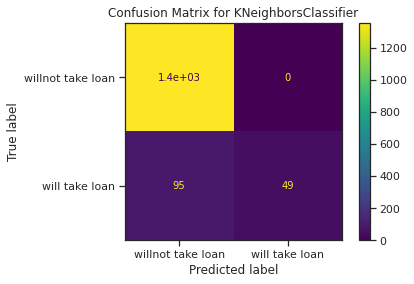

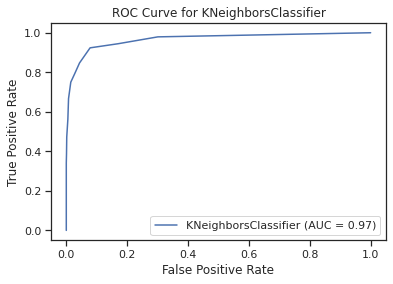

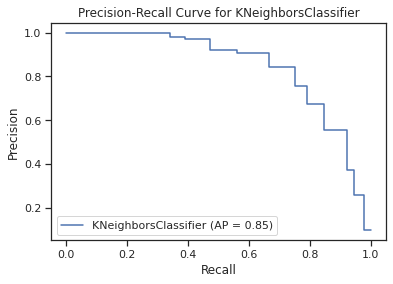

In [123]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(knn, test_X, test_Y, display_labels=lab_names)
plt.title('Confusion Matrix for KNeighborsClassifier')
plot_roc_curve(knn, test_X, test_Y)
plt.title('ROC Curve for KNeighborsClassifier')
plot_precision_recall_curve(knn, test_X, test_Y)
plt.title('Precision-Recall Curve for KNeighborsClassifier')



---



---


For KNeighbors Classifier,Training Accuracy is 93.60 % and Testing Accuracy is 93.66 % . We can say that this model is not so good compared to the previous models. \\
But, we can notice that, it predicted false positives exactly i.e, 0,that means it has correctly classified the persons who doesn't take the loan exactly.


---



---



## **Support Vector Machines(SVM)**

SVM classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.
SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

In [124]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_X,train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
y_predict=svm_model.predict(test_X)
print(y_predict)

[1 0 0 ... 0 0 0]


In [126]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error:  0.044
Root Mean Squared Error 0.20976176963403032
R2 Score 0.49299410029498525


In [127]:
print("Training Accuracy of SVM model:",svm_model.score(train_X,train_Y)*100)
print("Testing Accuracy of SVM  model:",metrics.accuracy_score(test_Y,y_predict)*100)

Training Accuracy of SVM model: 95.6
Testing Accuracy of SVM  model: 95.6


In [128]:
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.88      0.62      0.73       144

    accuracy                           0.96      1500
   macro avg       0.92      0.81      0.85      1500
weighted avg       0.95      0.96      0.95      1500



In [129]:
from sklearn.metrics import precision_score,recall_score
precision_svm = precision_score(test_Y, y_predict, labels=lab_names)
print('Precision:', precision_svm)
recall_svm = recall_score(test_Y, y_predict)
print('Recall:', recall_svm)

Precision: 0.8823529411764706
Recall: 0.625


Text(0.5, 1.0, 'Precision-Recall Curve for SVM ')

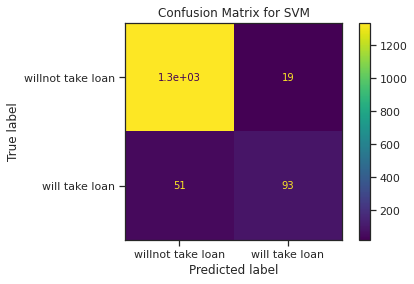

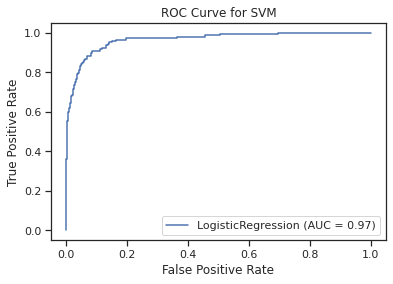

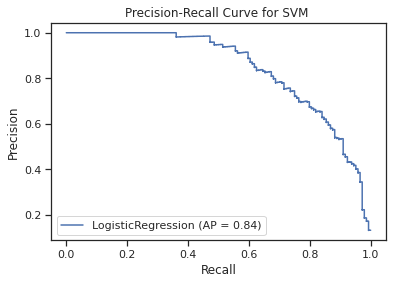

In [130]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(lr_model, test_X, test_Y, display_labels=lab_names)
plt.title('Confusion Matrix for SVM')
plot_roc_curve(lr_model, test_X, test_Y)
plt.title('ROC Curve for SVM')
plot_precision_recall_curve(lr_model, test_X, test_Y)
plt.title('Precision-Recall Curve for SVM ')



---



---


For the Support Vector Machine,Training Accuracy is 95.6 % and Testing Accuracy is 95.6 % which is good enough. But, we can see that the previous models are performing better than this algorithm in all aspects.


---



---



### **Neural Networks**

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function f(.) : $R_{m} --> R^{o}$
 by training on a dataset, where  m is the number of dimensions for input and  is the number of dimensions for output. Given a set of features X= $x_{1}, x_{2},.... x_{m}$
 and a target , it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. 

In [131]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500,random_state=1)
nn.fit(train_X,train_Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [132]:
y_predict = nn.predict(test_X)
print(y_predict)

[1 0 0 ... 0 0 0]


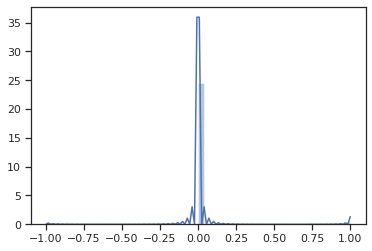

In [133]:
sns.distplot((test_Y - y_predict),bins = 50)

In [134]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error:  0.019333333333333334
Root Mean Squared Error 0.1390443574307614
R2 Score 0.777224680432645


In [135]:
print("Training Accuracy of Neural Networks:",nn.score(train_X,train_Y)*100)
print("Testing Accuracy of Neural Networks:",metrics.accuracy_score(test_Y,y_predict)*100)

Training Accuracy of Neural Networks: 98.11428571428571
Testing Accuracy of Neural Networks: 98.06666666666666


Text(0.5, 1.0, 'Precision-Recall Curve for Neural Networks')

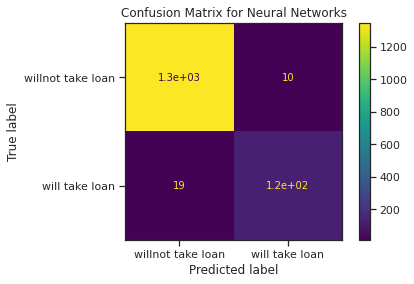

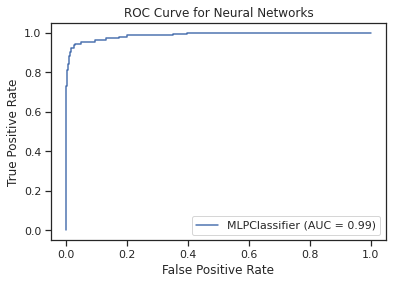

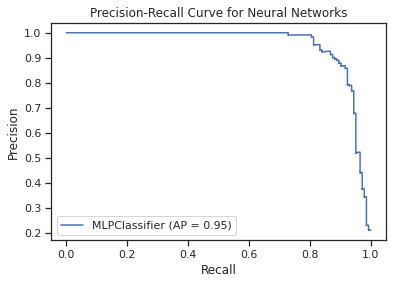

In [136]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(nn, test_X, test_Y, display_labels=lab_names)
plt.title('Confusion Matrix for Neural Networks')
plot_roc_curve(nn, test_X, test_Y)
plt.title('ROC Curve for Neural Networks')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plot_precision_recall_curve(nn, test_X, test_Y)
plt.title('Precision-Recall Curve for Neural Networks')



---



---


For Neural Networks,Training Accuracy is 97.85 % and Testing Accuracy is 97.93 
% which is pretty good but we can see that both the decision tree and random forest are performing better than this.

---



---



## **Bagging Classifier**

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator, by introducing randomization into its construction procedure and then making an ensemble out of it.

The **Bootstrap** is a powerful statistical method for estimating a quantity from a data sample. This is easiest to understand if the quantity is a descriptive statistic such as a mean or a standard deviation.

Here,we are implementing the bagging classifier using the *base estimator* as **Random Forest classifier**

In [137]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
bag_model = BaggingClassifier(base_estimator=randomforest_model, n_estimators=100,
                            bootstrap=True,
                            random_state=42)

bag_model.fit(train_X, train_Y)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=9,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
        

In [138]:
y_predict=bag_model.predict(test_X)
print(y_predict)

[1 0 0 ... 0 0 0]


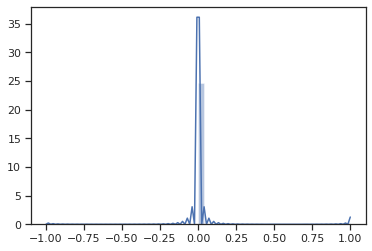

In [139]:
sns.distplot((test_Y - y_predict),bins = 50)

In [140]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error:  0.013333333333333334
Root Mean Squared Error 0.11547005383792516
R2 Score 0.8463618485742379


In [141]:
print("Training Accuracy of Bagging Classifier:",bag_model.score(train_X,train_Y)*100)
print("Testing Accuracy of Bagging Classifier:",metrics.accuracy_score(test_Y,y_predict)*100)

Training Accuracy of Bagging Classifier: 99.45714285714286
Testing Accuracy of Bagging Classifier: 98.66666666666667


In [142]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [143]:
from sklearn.metrics import precision_score,recall_score
precision_bc = precision_score(test_Y, y_predict, labels=lab_names)
print('Precision:', precision_bc)
recall_bc = recall_score(test_Y, y_predict)
print('Recall:', recall_bc)

Precision: 0.984375
Recall: 0.875


Text(0.5, 1.0, 'Precision-Recall Curve for Bagging Classifier')

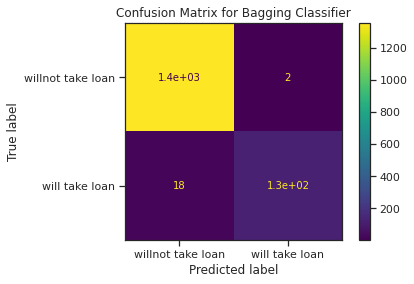

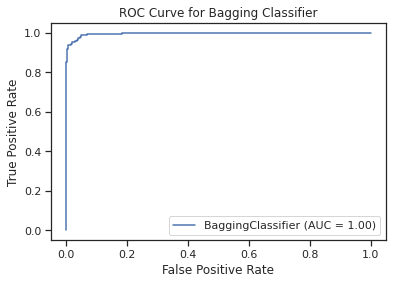

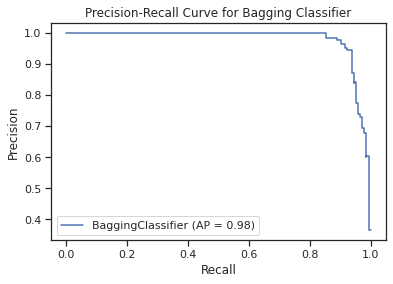

In [144]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(bag_model, test_X, test_Y, display_labels=lab_names)
plt.title('Confusion Matrix for Bagging Classifier')
plot_roc_curve(bag_model, test_X, test_Y)
plt.title('ROC Curve for Bagging Classifier')
plot_precision_recall_curve(bag_model, test_X, test_Y)
plt.title('Precision-Recall Curve for Bagging Classifier')



---



---


**Inference:**Here,we can see that,In Bagging Classifier using the *Random Forest* as the base estimator we got the Training Accuracy as 99.46 and
Testing Accuracy as 98.66. Here,we can see that **false negatives** are **less,18**(that means they actually take loan but we predicted them as NO),which is a good insight.we can see that the **false positives**(that means we predicted that they take loan but they don't actually take it) are also very **less - 2**.
So,we can use this model for our campaign.

---



---



## **Adaptive Boosting**

An AdaBoost  classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME 

In [145]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators=800, learning_rate=1)
ad.fit(train_X,train_Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=800, random_state=None)

In [146]:
y_predict=ad.predict(test_X)
print(y_predict)

[1 0 0 ... 0 0 0]


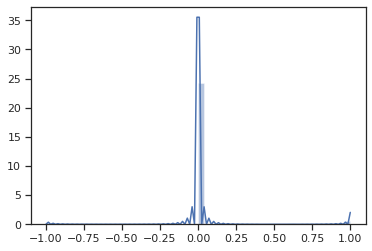

In [147]:
sns.distplot((test_Y - y_predict),bins = 50)

In [148]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_Y,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_Y,y_predict)))
print('R2 Score', metrics.r2_score(test_Y,y_predict))

Mean Absolute Error:  0.030666666666666665
Root Mean Squared Error 0.17511900715418263
R2 Score 0.6466322517207472


In [149]:
print("Training Accuracy of Adaptive Boosting:",ad.score(train_X,train_Y)*100)
print("Testing Accuracy of Adaptive Boosting:",metrics.accuracy_score(test_Y,y_predict)*100)

Training Accuracy of Adaptive Boosting: 97.88571428571429
Testing Accuracy of Adaptive Boosting: 96.93333333333334


In [150]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1356
           1       0.87      0.80      0.83       144

    accuracy                           0.97      1500
   macro avg       0.93      0.89      0.91      1500
weighted avg       0.97      0.97      0.97      1500



In [151]:
from sklearn.metrics import precision_score,recall_score
precision = precision_score(test_Y, y_predict, labels=lab_names)
print('Precision:', precision)
recall = recall_score(test_Y, y_predict)
print('Recall:', recall)

Precision: 0.8712121212121212
Recall: 0.7986111111111112


Text(0.5, 1.0, 'Precision-Recall Curve for Adaptive Boosting')

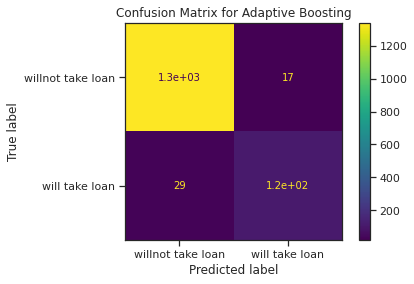

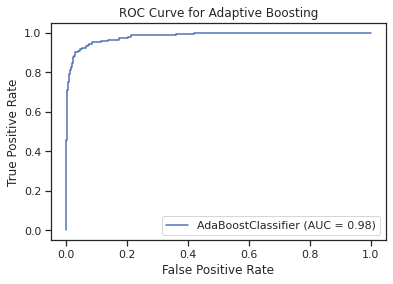

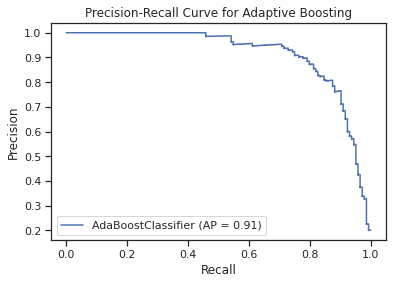

In [152]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(ad, test_X, test_Y, display_labels=lab_names)
plt.title('Confusion Matrix for Adaptive Boosting')
plot_roc_curve(ad, test_X, test_Y)
plt.title('ROC Curve for Adaptive Boosting')
plot_precision_recall_curve(ad, test_X, test_Y)
plt.title('Precision-Recall Curve for Adaptive Boosting')



---



---


For Adaptive Boosting, we got Training Accuracy of 97.88 and Testing Accuracy 
of 96.93 and relatively less number of false positives and false negatives .
But, we can see that other models like Decision tree, Random Forest Classifier and bagging using random forest have got more accuracy and less number of false positives


---


---




# **Model Comparision**

We are going to use a k-fold validation to evaluate each algorithm and will run through each model with a for loop, running the analysis and then storing the outcomes into the lists we created above. We’ll use a 10-fold cross validation.

In [153]:
from sklearn import model_selection
random_seed = 66
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()),  
          ('CART', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('NN', MLPClassifier()),
          ('NB', GaussianNB()),
          ('SVM',svm.SVC(kernel='linear')),
          ('RF',RandomForestClassifier())
          ]
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, data_X, data_Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LogReg| Mean=0.952000 STD=0.008626
CART| Mean=0.983600 STD=0.002800
KNN| Mean=0.955600 STD=0.008754


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.ma

NN| Mean=0.977800 STD=0.005546
NB| Mean=0.910200 STD=0.008171
SVM| Mean=0.955600 STD=0.006621


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF| Mean=0.988000 STD=0.003578


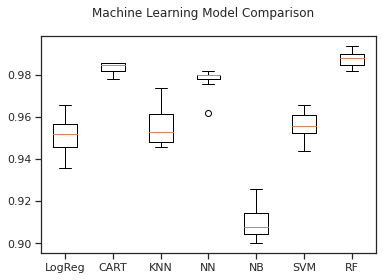

In [154]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

## **Conclusion:**

Here,
- We have removed ID column because it has no relevance
- Dropped Experience column as it has got outliers and has high correlation with Age feature
- Next, to remove outliers, we applied several transformation techniques
- Next, we split the data into train and test data using stratified sampling as we have only a few customers who has taken loan
- We applied various algorithms, checked their accuracies,precision and recall values and found the errors using several metrics
- We applied model comparision to know which algorithm is best
- Finally, we concluded that Random Forest is suiting our needs

# **Business Understanding**

The classification goal of our project is **to predict the likelihood of a liability customer buying personal loans**. \\
For this type of classification problems,number of false positives plays main role ,that means the less the number of false positives(that means that they actually take loan but we haven't predicted it correctly),the more good our model is. \\
#### **Here, In Random Forest Classifier ,we have less False Negatives(16),that means they actually take loan but we predicted them as NO and number of False Positives(5)-that means we predicted that they take loan but they don't actually take it, are also less, so that we don't waste our time knocking doors of people who don't actually take loan.** 
\\
In Decision Tree Classifier, we got similar accuracies and similar number of less false positives and false negatives. So, we can use this model also. \\
**In Bagging Classifier when the base estimator is set to  Random Forest classifier,we got better results, even we can use this model for bank campaign. 
Here,number of false negatives are 18 and number of flase positives are 2**

We can see that both Random Forest Classifier and Bagging classifier where base estimator is set to Random Forest both are good and have similar accuracies and more precision.

However, We can see that number of false positives for Random Forest Classifier is less.
## **So, We can conclude that, Random Forest Classifier suits best for our Bank Campaign.**